<a href="https://colab.research.google.com/github/Jaise152/NLP/blob/main/Data_Analysis_and_Visualization_of_Text_Dataset_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud

from nltk import word_tokenize
from nltk import sent_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download snap/amazon-fine-food-reviews

 99% 240M/242M [00:02<00:00, 111MB/s] 
100% 242M/242M [00:02<00:00, 107MB/s]


In [6]:
! unzip amazon-fine-food-reviews.zip

Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [7]:
df = pd.read_csv('/content/Reviews.csv')

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df.shape

(568454, 10)

In [10]:
df.isnull().values.any()

True

In [11]:
df.dropna(axis=0, inplace =True)

In [12]:
df.shape

(568411, 10)

In [13]:
df.drop_duplicates(subset = ['Score', 'Text'], keep = 'first', inplace = True)

In [14]:
df.shape

(393661, 10)

In [15]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


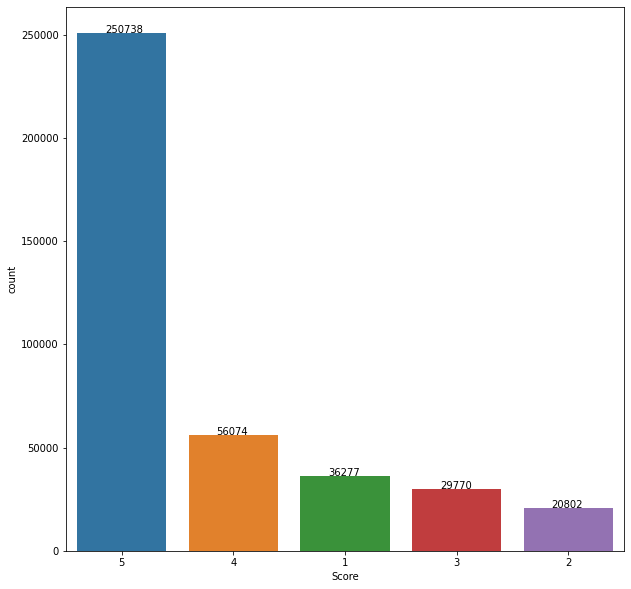

In [16]:
plt.figure(figsize= (10,10))
ax = sns.countplot(x = df['Score'], data =df, order= df["Score"].value_counts().index)
for p, label in zip(ax.patches, df["Score"].value_counts()):
  ax.annotate(label, (p.get_x()+.25, p.get_height()+.5))

In [17]:
df.groupby('ProductId').count()

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
ProductId,,,,,,,,,
0006641040,37,37,37,37,37,37,37,37,37
141278509X,1,1,1,1,1,1,1,1,1
2734888454,2,2,2,2,2,2,2,2,2
2841233731,1,1,1,1,1,1,1,1,1
7800648702,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
B009SF0TN6,1,1,1,1,1,1,1,1,1
B009SR4OQ2,1,1,1,1,1,1,1,1,1
B009UOFU20,1,1,1,1,1,1,1,1,1


Filter by grou count greater that 400 reviews

In [18]:
df_products = df.groupby("ProductId").filter(lambda x: len(x)>400)

In [19]:
df_products.shape

(12034, 10)

In [20]:
df_products_groups = df_products.groupby("ProductId")

In [21]:
len(df_products_groups)

23

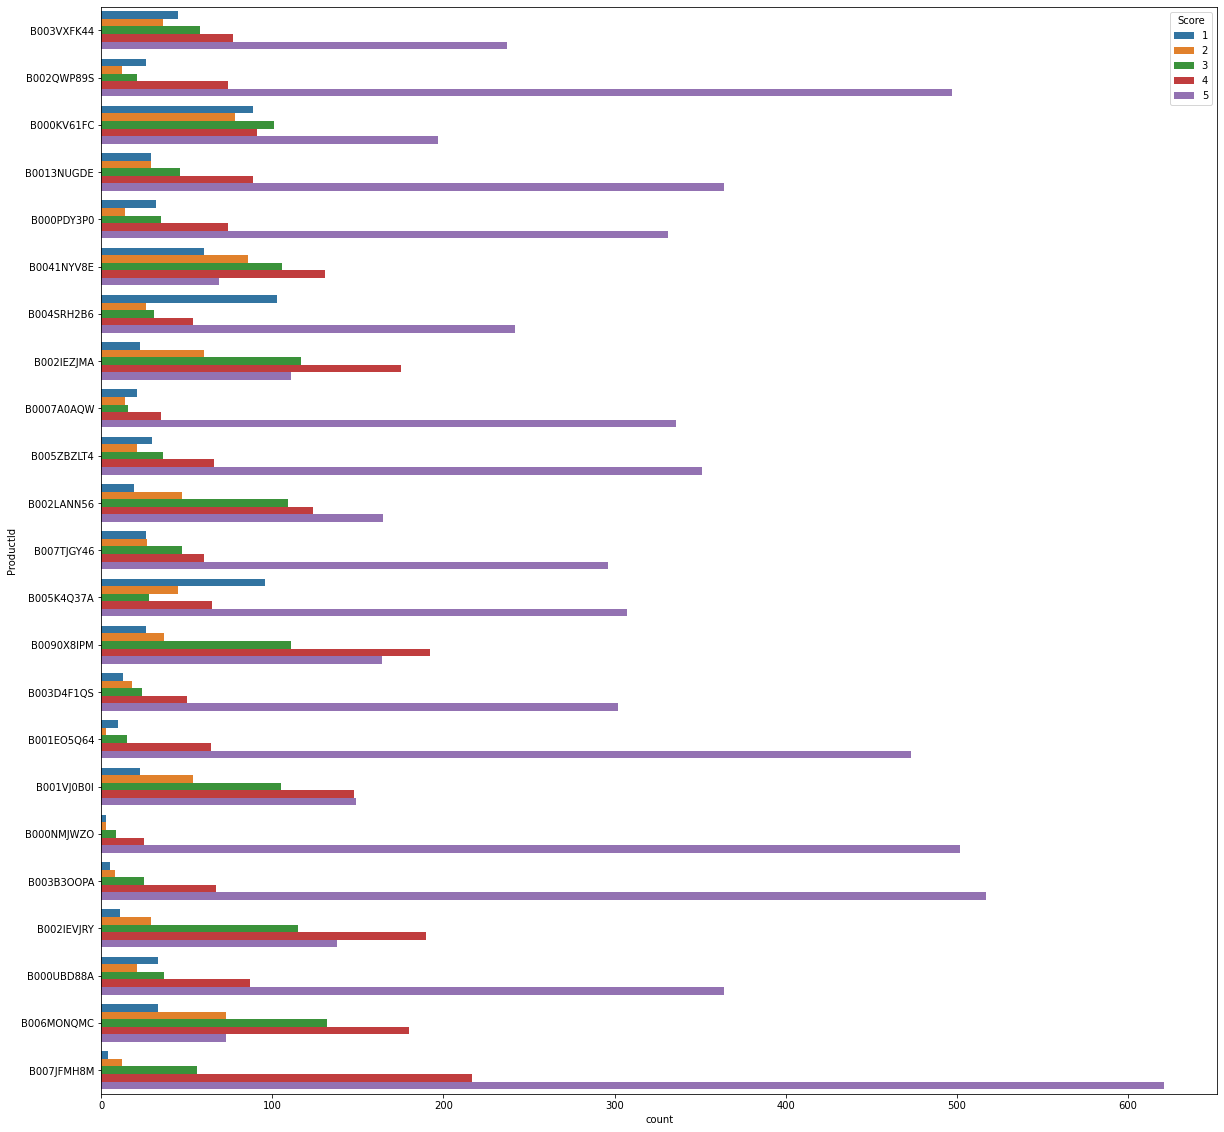

In [22]:
plt.figure(figsize= (20,20))
sns.countplot(y='ProductId', hue = 'Score', data =df_products)

In [23]:
df_products

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
8284,8285,B003VXFK44,A5U24IWH64IFF,Kimdoll,1,1,5,1302480000,Absolutely delicious coffee!,"I am a huge coffee drinker, and love the k-cup..."
8285,8286,B003VXFK44,A1RVCWFP3SC3GU,Cakediva,1,1,5,1300233600,YUMMY,We always drink Timmothy's or Emeril's. Though...
8286,8287,B003VXFK44,A12SO47JRQGUPR,"Thomas Smith ""tjaye""",1,1,4,1299801600,Good Stuff,Good subtle flavored coffee for the mid-aftern...
8287,8288,B003VXFK44,A86RUZGD22FDR,Another coffee drinker,1,1,5,1299110400,Delivers what was promises,Wolfgang Puck's Chef's Reserve Colombian (Dark...
8288,8289,B003VXFK44,A3LQS08K2OBI5Z,J. Lim,1,1,3,1298332800,My mom said this was not as flavorful as other...,This is the most USEFUL info you will ever nee...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,1343520000,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,1343433600,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,1343433600,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,1343433600,yummy,I love the Quaker soft baked cookies. The rea...


In [24]:
len(df_products['UserId'].unique())

9965

In [25]:
len(df['UserId'].unique())

256036

Number of users gave more than 10 review

In [26]:
df_users10 = df.groupby('UserId').filter(lambda x : len(x)>= 10)
df_usergroup10 = df_users10.groupby("UserId")
print(len(df_usergroup10))

2555


Number of users gave more than 5 review

In [27]:
df_users5 = df.groupby('UserId').filter(lambda x : len(x)>= 5)
df_usergroup5 = df_users5.groupby("UserId")
print(len(df_usergroup5))

8330


Number of users gave more than 2 review

In [28]:
df_users2 = df.groupby('UserId').filter(lambda x : len(x)>= 2)
df_usergroup2 = df_users2.groupby("UserId")
print(len(df_usergroup2))

50382


Number of users gave more than 50 review

In [29]:
df_users50 = df.groupby('UserId').filter(lambda x : len(x)>= 50)
df_usergroup50 = df_users50.groupby("UserId")
print(len(df_usergroup50))

111


Number of users gave more than 100 review

In [30]:
df_users100 = df.groupby('UserId').filter(lambda x : len(x)>= 100)
df_usergroup100 = df_users100.groupby("UserId")
print(len(df_usergroup100))

18


How many users gave morethan 100 reviews and product

In [31]:
print('Number of users '+str(len(df_usergroup100)))


Number of users 18


In [32]:
print("Number of Product "+str(len(df_users100.groupby("ProductId"))))

Number of Product 2507


In [33]:
df_users100['ProductId'].value_counts()

B003CK2BQG    8
B002IEZJMA    6
B006MONQMC    5
B001VJ0B0I    5
B004SRH2B6    5
             ..
B001EQ5SEC    1
B000MIFS1G    1
B001EQ5SGU    1
B001A3EDAO    1
B001EO5Y52    1
Name: ProductId, Length: 2507, dtype: int64

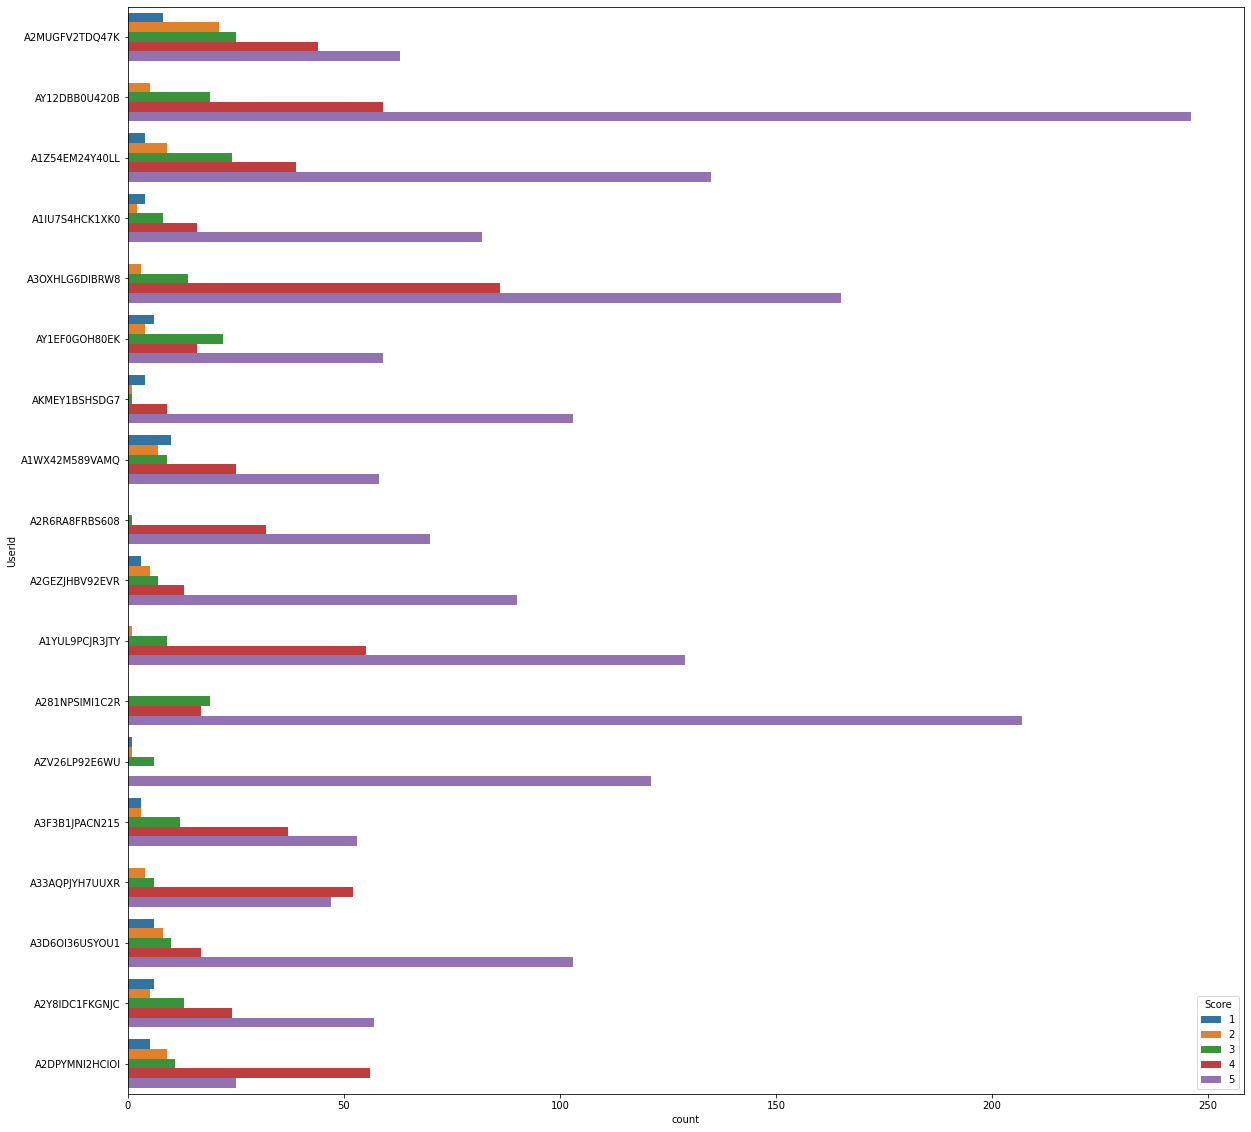

In [34]:
plt.figure(figsize= (20,20))
sns.countplot(y='UserId',hue= "Score", data=df_users100)

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [39]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text.lower())
  sentance = [w for w in words if not w in stop_words]
  return " ".join(sentance)

In [40]:
def lemmatize_test(text):
  wordlist = []
  lemmatizer = WordNetLemmatizer()
  sentances = sent_tokenize(text)
  for sentance in sentances:
    words = word_tokenize(sentance)
    for word in words:
      wordlist.append(lemmatizer.lemmatize(word))
  return " ".join(wordlist)

In [41]:
def clean_text(text):
  delete_dict = {sp_character: "" for sp_character in string.punctuation}
  delete_dict[' '] = ' '
  table = str.maketrans(delete_dict)
  text1 = text.translate(table)
  testArr = text1.split()
  test2 = " ".join(w for w in testArr)
  return test2.lower()

In [42]:
mask1 = (df_users100["Score"]==1 | (df_users100["Score"]==2))

In [43]:
df_user100_12 = df_users100[mask1]

In [44]:
mask2 = (df_users100["Score"]==3 | (df_users100["Score"]==4)| (df_users100["Score"]==5) )
df_user100_345 = df_users100[mask2]

In [45]:
len(df_user100_12)

60

In [46]:
len(df_user100_345)

60

In [47]:
df_user100_12['Text'] = df_user100_12['Text'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_user100_12['Text'] = df_user100_12['Text'].apply(remove_stopwords)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_user100_12['Text'] = df_user100_12['Text'].apply(lemmatize_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_user100_345['Text'] = df_user100_345['Text'].apply(clean_text)
df_user100_345['Text'] = df_user100_345['Text'].apply(remove_stopwords)
df_user100_345['Text'] = df_user100_345['Text'].apply(lemmatize_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [70]:
df_user100_12["len of review"] = df_user100_12["Text"].apply(lambda x : len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
df_user100_345["len of review"] = df_user100_345["Text"].apply(lambda x : len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
df_user100_12["len of review"].describe()

count      60.000000
mean      501.916667
std       614.412750
min        66.000000
25%       234.000000
50%       359.500000
75%       517.750000
max      4379.000000
Name: len of review, dtype: float64

In [75]:
df_user100_345["len of review"].describe()

count      60.000000
mean      501.916667
std       614.412750
min        66.000000
25%       234.000000
50%       359.500000
75%       517.750000
max      4379.000000
Name: len of review, dtype: float64

In [ ]:
df_user100_12["Text"].apply(lambda x : len(str(x).split()))

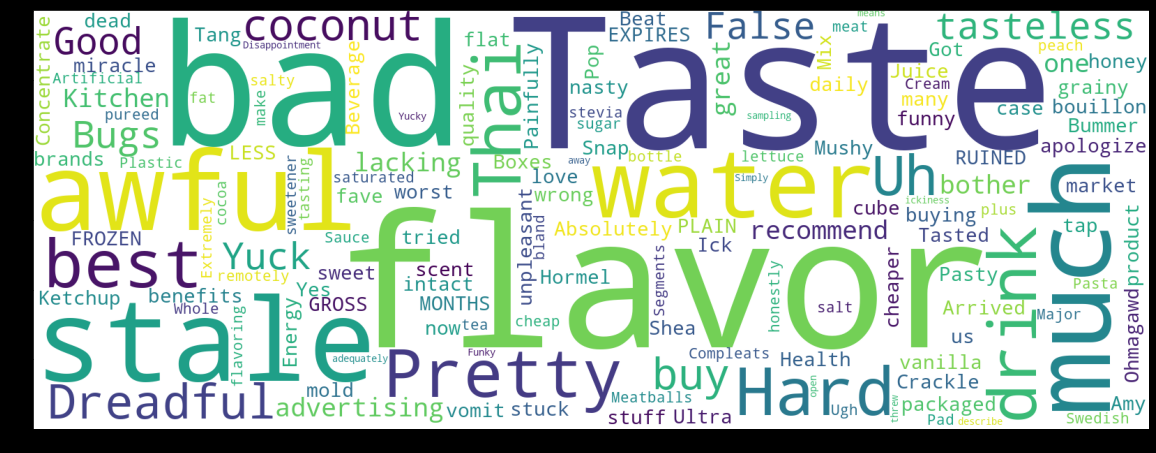

In [83]:
WordCloud = WordCloud(background_color = "white", width = 1600, height = 600).generate(' '.join(df_user100_12['Summary'].tolist()))
plt.figure(figsize = (20,10), facecolor= 'k')
plt.imshow(WordCloud)